# The Cifar HW

Here you will implement a convolutional neural net on the cifar-10 dataset. You will be implementing the architecture in the diagram below (note that there are 3 input channels as these are color images):

![](architecture-1.png)

for example the set in the (1) in the diagram can be implemented as:

```python
# Layer 1: 5x5@64 convolution -> ReLU -> 2x2 maxpool
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, 
                     stride=1, padding=2),  # padding=2 to maintain spatial dimensions
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
```

What does this convolution mean?

First see:

![](Figure-21-034.png)

For any one filter, there are 3 input channels (`in_channels=3`), so there are 3 parts of the filter corresponding to the 3 input channels: a blue part, a red part, and a green part. So the filter is really a 5x5(width x height, `kernel_size`) TIMES 3 (depth). So for each output, this filter has 9 x 3(depth) = 27 weights and a bias. And how many filters are we trying to learn here? 64(`out_channels=64`). What are these filters. We dont know, but we train all 64 28 parameneter filters the same way...initialize with garbage random values and minimize the cross-entropy loss. We hope that one picks out straight lines, the other curved lines, and so on and so forth.

The diagram below shoes an example where we try and learn 4 filters rather than 64, so that there are 4 output channels pasted together into an image of depth 4)
![](Figure-21-037.png)

Notice the `stride=1` which means we'll move the filter over by 1. And then notice `padding=2`, so we'll put two 0 valued pixel rows/columns outside the image, and so when we are finished with the convolution, we'll get an image with the same width and height.

Files already downloaded and verified
Files already downloaded and verified
Training set size: 50000
Test set size: 10000
Number of classes: 10

Classes: plane, car, bird, cat, deer, dog, frog, horse, ship, truck

Showing random individual images:


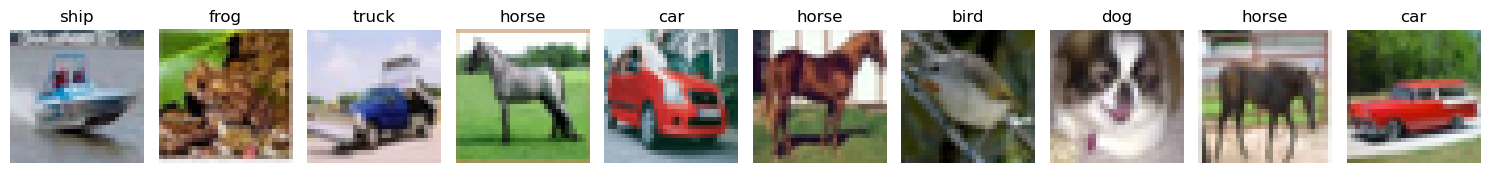


Showing images from a batch:


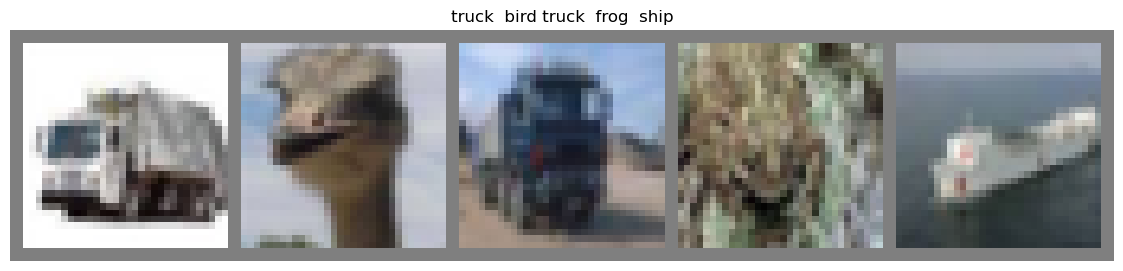


Calculating dataset statistics...
Dataset mean: tensor([-0.0172, -0.0357, -0.1069])
Dataset std: tensor([0.4913, 0.4843, 0.5196])


In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

# Define the classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                           train=True,
                                           download=True, 
                                           transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                          train=False,
                                          download=True, 
                                          transform=transform)

# Create data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                         batch_size=batch_size,
                                         shuffle=True, 
                                         num_workers=2)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                        batch_size=batch_size,
                                        shuffle=False, 
                                        num_workers=2)

def imshow(img):
    """
    Function to show an image
    """
    # Unnormalize
    img = img / 2 + 0.5
    # Convert to numpy array
    npimg = img.numpy()
    # Transpose from (channels, height, width) to (height, width, channels)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

def show_random_images(dataset, num_images=10):
    """
    Display random images from the dataset with their labels
    """
    # Create figure
    fig = plt.figure(figsize=(15, 3))
    
    # Display random images
    for i in range(num_images):
        idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[idx]
        
        # Add subplot
        ax = fig.add_subplot(1, num_images, i + 1)
        imshow(img)
        ax.set_title(f'{classes[label]}')
    
    plt.tight_layout()
    plt.show()

def show_batch_images():
    """
    Display a batch of images
    """
    # Get a batch of training images
    dataiter = iter(train_loader)
    images, labels = next(dataiter)
    
    # Show images
    plt.figure(figsize=(15, 3))
    imshow(torchvision.utils.make_grid(images[:5]))
    plt.title(' '.join('%5s' % classes[labels[j]] for j in range(5)))
    plt.show()

# Print dataset information
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Number of classes: {len(classes)}")
print("\nClasses:", ', '.join(classes))

# Show some random individual images
print("\nShowing random individual images:")
show_random_images(train_dataset)

# Show some images from a batch
print("\nShowing images from a batch:")
show_batch_images()

# Example of getting dataset statistics
def get_dataset_stats():
    """
    Calculate mean and std of the dataset
    """
    means = torch.zeros(3)
    stds = torch.zeros(3)
    for images, _ in train_loader:
        # Calculate mean over batch, height, and width
        batch_means = torch.mean(images, dim=(0,2,3))
        batch_stds = torch.std(images, dim=(0,2,3))
        means += batch_means
        stds += batch_stds
    
    # Divide by number of batches
    means /= len(train_loader)
    stds /= len(train_loader)
    
    return means, stds

print("\nCalculating dataset statistics...")
means, stds = get_dataset_stats()
print(f"Dataset mean: {means}")
print(f"Dataset std: {stds}")

In [9]:
class CIFARNet(nn.Module):
    def __init__(self, num_classes=4096):
        super(CIFARNet, self).__init__()
        
        # Convolutional layers
        self.conv_layers = nn.Sequential(
            # Layer 1: 5x5@64 convolution -> ReLU -> 2x2 maxpool
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, 
                     stride=1, padding=2),  # padding=2 to maintain spatial dimensions
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Layer 2: 5x5@192 convolution -> ReLU -> 2x2 maxpool
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, 
                     stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        
        
            # your additional code inside the Sequntial
            # read up nn.Sequential in pytorch docs
            # You need to implement 3, 4, 5 from diagram
        
        )
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            # Layer 6: FC 4096x256 -> ReLU
            nn.Linear(256 * 1 * 1, 4096),
            nn.ReLU(),
            
            # Layer 7: FC 4096x4096 -> ReLU
            nn.Linear(4096, 4096),
            nn.ReLU(),
            
            # Layer 8: FC 4096xnum_classes -> Softmax
            nn.Linear(4096, num_classes),
            nn.Softmax(dim=1)
        )
        
    def forward(self):
        # Pass through convolutional layers
        x = self.conv_layers(x)
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)
        
        # Pass through fully connected layers
        x = self.fc_layers(x)
        return x
        




After the convolutional layers, we flatten the image into a vector, and now do a multi-layer=perceptron just like we did with MNIST. A multi-layer perceptron also goes by the name: fully connected layers.

### Q1. Calculate the total number of parameters in the model, layer by layer.

### Q2. Your job is to implement the model as specified in the diagram, using the training loop code from MNIST (remember that does not change?). Do this on colab as it will take some time to train. Remember to set the runtime to GPU.